Demo day

Analisis de incentivos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis
from sklearn.linear_model import LinearRegression

In [2]:
datos = pd.read_csv('../../beduadp/Proyecto_final/Concentrado_Total.csv')
df = pd.DataFrame(datos)
df

,An_o,Mes,Periodo,Corrida,Id_Empleado,Sueldo_Diario,SDI,Jornada,Plan,RUTA,...,ISR_Ajuste_Anual,IMSS_Total,Descuento_Infonavit,Infonacot,Descuento,Descuento_Especial,Descuento_Despensa,Percepciones,Deducciones,A_pagar
0,2020,1,1,104148,34316,450.16,481.740,7 dias,P0101,CIUDAD DE MEXICO,...,0.0,185.32,0.0,0.0,0.0,0.0,1,7427.64,1134.66,6292.98
1,2020,1,2,104245,34316,450.16,481.740,7 dias,P0101,CIUDAD DE MEXICO,...,0.0,197.67,0.0,0.0,63.0,0.0,1,7922.82,1273.23,6649.59
2,2020,2,1,104328,34316,450.16,481.740,7 dias,P0101,CIUDAD DE MEXICO,...,0.0,184.89,0.0,0.0,0.0,0.0,1,7427.64,1134.23,6293.41
3,2020,2,2,104491,34316,450.16,481.740,7 dias,P0101,CIUDAD DE MEXICO,...,0.0,172.56,0.0,0.0,0.0,0.0,1,6932.46,999.08,5933.38
4,2020,3,1,104582,34316,450.16,480.770,7 dias,P0101,CIUDAD DE MEXICO,...,0.0,184.48,0.0,0.0,0.0,0.0,1,7427.64,1133.82,6293.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68755,2021,5,2,105826,201697,150.00,156.781,7 dias,P0707,JALISCO,...,0.0,0.00,0.0,0.0,0.0,0.0,0,0.00,0.00,0.00
68756,2021,5,2,105820,201698,267.05,279.122,7 dias,P0803,BAJA CALIFORNIA,...,0.0,46.69,0.0,0.0,0.0,0.0,1,2392.17,-256.41,2648.58
68757,2021,5,2,105826,201698,267.05,279.122,7 dias,P0803,BAJA CALIFORNIA,...,0.0,0.00,0.0,0.0,0.0,0.0,0,0.00,0.00,0.00
68758,2021,5,2,105820,201699,388.33,405.885,7 dias,P0410,TABASCO,...,0.0,50.94,0.0,0.0,0.0,0.0,1,2194.07,-247.07,2441.14


Analisis de las columnas

In [3]:
df.columns

Index(['An_o', 'Mes', 'Periodo', 'Corrida', 'Id_Empleado', 'Sueldo_Diario',
       'SDI', 'Jornada', 'Plan', 'RUTA', 'Nomina', 'Faltas', 'Incapacidades',
       'Dias_Festivos', 'Dias_Descanso_Trabajados', 'Dias_Trabajados',
       'Dias_Vacaciones', 'Devolucion_Infonavit', 'Devolucion_Infonacot',
       'Subsidio_al_Empleo', 'Ayuda_de_Auto', 'Reembolso_de_Transporte',
       'Viaticos', 'Incentivo_Total', 'Incentivo_Grossup', 'Ajuste_Grossup',
       'Sueldo_Vacaciones', 'Despensa_Vacaciones', 'Aguinaldo', 'Vacaciones',
       'Gratificacion', 'Liquidacion', 'Proporcional_Finiquito',
       'Prima_Vacacional', 'Prima_Dominical', 'PTU', 'Sueldo_Total',
       'Despensa', 'Pago_Dias_Festivos', 'Pago_Descanso_Trabajado',
       'Pension_Alimenticia', 'Plan_Lealtad', 'Prestamo_a_Cuotas',
       'Ajuste_Infonavit', 'Seguro_Infonavit', 'ISR_Total',
       'ISR__Ajuste_Mensual', 'Subsidio_Ajuste_Mensual', 'Subsidio_Mensual',
       'ISR_Mensual', 'ISR_Ajuste_Anual', 'IMSS_Total', 'Descuento_

Filtrado de datos

In [4]:
df_type = df['Nomina'] == 'REGULAR'
df_2020 = df[df_type]
df_year = df_2020['An_o'] == 2020
df_2020 = df_2020[df_year]
df_month = df_2020['Mes'] == 4
df_2020 = df_2020[df_month]
df_plan = df_2020['Plan'] == 'P0701'
df_2020 = df_2020[df_plan]
df_cero = df_2020['Incentivo_Total'] != 0
df_2020 = df_2020[df_cero]
df_2020['Incentivo_Total']

822      4477.95
850      4477.95
905      2762.10
961      4477.95
989      5161.50
          ...   
47114    2762.10
47826    2762.10
47854    1684.80
48328    4477.95
50085    2494.80
Name: Incentivo_Total, Length: 219, dtype: float64

Estimados de locacion

In [5]:
incentivo_2020 = df_2020['Incentivo_Total']
print(f'Media: {incentivo_2020.mean()}')
print(f'Mediana: {incentivo_2020.median()}')
print(f'Media truncada : {stats.trim_mean(incentivo_2020, 0.1)}')
print(f'Desviacion estandar : {incentivo_2020.std()}')

Media: 3163.1612328767114
Mediana: 2901.6
Media truncada : 3082.4070621468923
Desviacion estandar : 759.5664341999005


La media truncada es mas cercana a la media y los datos estan muy cercanos entre si

Cuartiles y rango intercuartilico

In [6]:
print(f'Valor mínimo: {df_2020["Incentivo_Total"].min()}')
print(f'Percentil 0: {df_2020["Incentivo_Total"].quantile(0)}')
print(f'Percentil 10: {df_2020["Incentivo_Total"].quantile(0.1)}')
print(f'Percentil 25: {df_2020["Incentivo_Total"].quantile(0.25)}')
print(f'Percentil 50: {df_2020["Incentivo_Total"].median()}')
print(f'Mediana: {df_2020["Incentivo_Total"].quantile(0.5)}')
print(f'Percentil 75: {df_2020["Incentivo_Total"].quantile(0.75)}')
print(f'Percentil 90: {df_2020["Incentivo_Total"].quantile(0.9)}')
print(f'Percentil 100: {df_2020["Incentivo_Total"].quantile(1)}')
print(f'Valor máximo: {df_2020["Incentivo_Total"].max()}')
print(f'Rango intercuartilico: {df_2020["Incentivo_Total"].quantile(0.75) - df_2020["Incentivo_Total"].quantile(0.25)}')

Valor mínimo: 891.0
Percentil 0: 891.0
Percentil 10: 2762.1
Percentil 25: 2762.1
Percentil 50: 2901.6
Mediana: 2901.6
Percentil 75: 3166.65
Percentil 90: 4477.95
Percentil 100: 5161.5
Valor máximo: 5161.5
Rango intercuartilico: 404.5500000000002


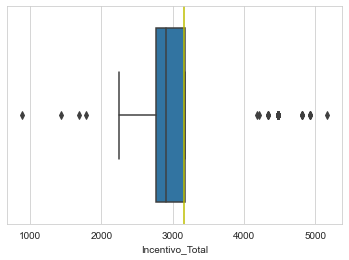

In [7]:
sns.set_style("whitegrid")
sns.boxplot(x=df_2020["Incentivo_Total"])
plt.axvline(df_2020["Incentivo_Total"].mean(), c='y');

Filtrando valores atipicos para centralizar los datos

In [8]:
iqr = df_2020["Incentivo_Total"].quantile(0.75) - df_2020["Incentivo_Total"].quantile(0.25)
filtro_inferior = df_2020["Incentivo_Total"] > df_2020["Incentivo_Total"].quantile(0.25) - (iqr * 1.5)
filtro_superior = df_2020["Incentivo_Total"] < df_2020["Incentivo_Total"].quantile(0.75) + (iqr * 1.5)

df_filtrado = df_2020[filtro_inferior & filtro_superior]

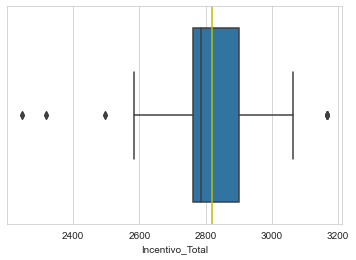

In [9]:
sns.boxplot(x=df_filtrado['Incentivo_Total'])
plt.axvline(df_filtrado['Incentivo_Total'].mean(), c='y');

Histograma 2020

Curtosis: 0.3148779104025916
Asimetría: 1.0028246133120664


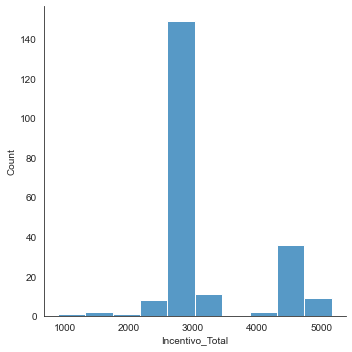

In [10]:
filtro_2020 = df_2020['Incentivo_Total']
sns.set_style('white')
sns.displot(filtro_2020, kde=False, bins=10);
print(f'Curtosis: {kurtosis(filtro_2020)}')
print(f'Asimetría: {skew(filtro_2020)}');

Se comprueba curtosis casi normal con asimetria positiva

In [11]:
df_type_1 = df['Nomina'] == 'REGULAR'
df_2021 = df[df_type_1]
df_year_1 = df_2021['An_o'] == 2021
df_2021 = df_2021[df_year_1]
df_month_1 = df_2021['Mes'] == 4
df_2021 = df_2021[df_month_1]
df_plan_1 = df_2021['Plan'] == 'P0701'
df_2021 = df_2021[df_plan_1]
df_cero_1 = df_2021['Incentivo_Total'] != 0
df_2021 = df_2021[df_cero_1]
df_2021['Incentivo_Total']

53008    4017.18
53020    4017.18
53044    2845.80
53068    4386.58
53080    4490.51
          ...   
67955    2985.30
67972    2845.80
67983    2985.30
67993    2845.80
68303    2845.80
Name: Incentivo_Total, Length: 235, dtype: float64

Histograma 2021

Curtosis: 2.009416179392404
Asimetría: 1.0207904103667358


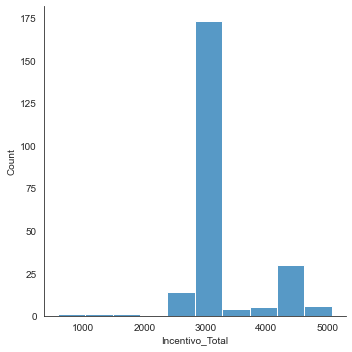

In [12]:
filtro_2021 = df_2021['Incentivo_Total']
sns.set_style('white')
sns.displot(filtro_2021, kde=False, bins=10);
print(f'Curtosis: {kurtosis(filtro_2021)}')
print(f'Asimetría: {skew(filtro_2021)}');

Curtosis y asimetria positiva

Grafica de densidad para comparar

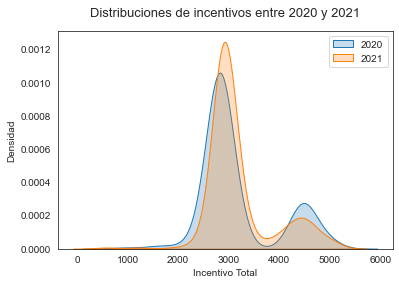

In [13]:
ax = sns.kdeplot(filtro_2020, label = '2020',shade=True)
sns.kdeplot(filtro_2021,shade=True, ax=ax, label = '2021')
ax.set_title('Distribuciones de incentivos entre 2020 y 2021', fontsize=13, pad=15);
ax.set(xlabel='Incentivo Total');
ax.set(ylabel='Densidad');
ax.legend(loc='upper right');

Muy similares entre si y con un ligero aumento con los valores centrales en el 2021

Matriz de corelacion

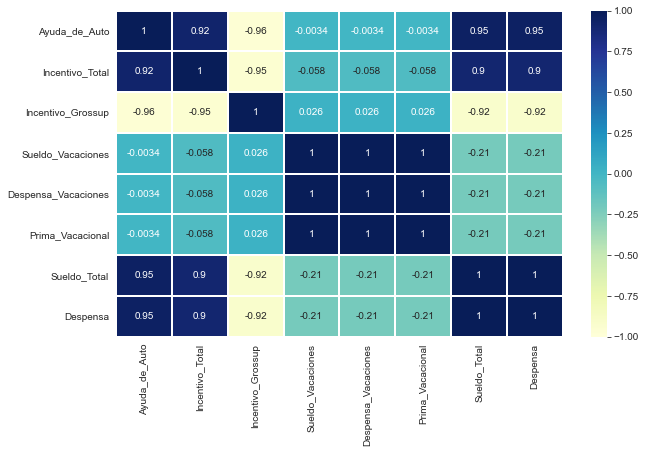

In [14]:
df_2020_percepciones = df_2020.drop(columns=['An_o', 'Mes', 'Periodo', 'Corrida', 'Id_Empleado', 'Sueldo_Diario','SDI', 'Jornada', 'Plan', 'RUTA', 'Nomina', 'Faltas', 'Incapacidades','Dias_Festivos', 'Dias_Descanso_Trabajados', 'Dias_Trabajados','Dias_Vacaciones','Subsidio_al_Empleo','Pension_Alimenticia', 'Plan_Lealtad', 'Prestamo_a_Cuotas','Ajuste_Infonavit', 'Seguro_Infonavit', 'ISR_Total','ISR__Ajuste_Mensual', 'Subsidio_Ajuste_Mensual', 'Subsidio_Mensual','ISR_Mensual', 'ISR_Ajuste_Anual', 'IMSS_Total', 'Descuento_Infonavit','Infonacot', 'Descuento', 'Descuento_Especial', 'Descuento_Despensa','Percepciones', 'Deducciones', 'A_pagar'])
df_2020_percepciones = df_2020_percepciones.drop(columns=['Devolucion_Infonavit', 'Devolucion_Infonacot','Reembolso_de_Transporte','Viaticos', 'Ajuste_Grossup','Aguinaldo', 'Vacaciones','Gratificacion', 'Liquidacion', 'Proporcional_Finiquito','Prima_Dominical','PTU','Pago_Dias_Festivos','Pago_Descanso_Trabajado'])
plt.figure(figsize=(10, 6))
ax = sns.heatmap(df_2020_percepciones.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.1);

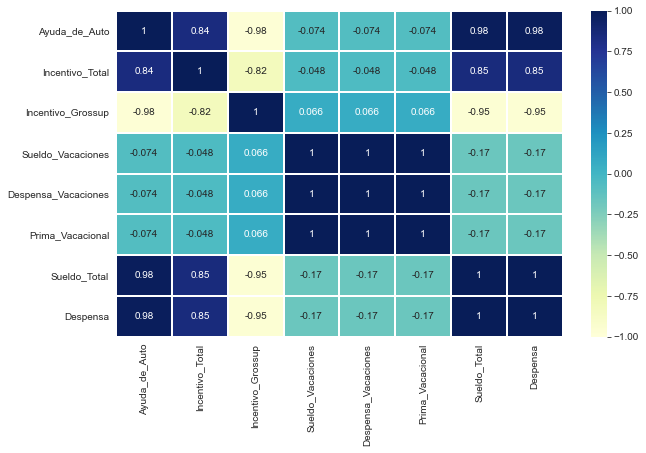

In [15]:
df_2021_percepciones = df_2021.drop(columns=['An_o', 'Mes', 'Periodo', 'Corrida', 'Id_Empleado', 'Sueldo_Diario','SDI', 'Jornada', 'Plan', 'RUTA', 'Nomina', 'Faltas', 'Incapacidades','Dias_Festivos', 'Dias_Descanso_Trabajados', 'Dias_Trabajados','Dias_Vacaciones','Subsidio_al_Empleo','Pension_Alimenticia', 'Plan_Lealtad', 'Prestamo_a_Cuotas','Ajuste_Infonavit', 'Seguro_Infonavit', 'ISR_Total','ISR__Ajuste_Mensual', 'Subsidio_Ajuste_Mensual', 'Subsidio_Mensual','ISR_Mensual', 'ISR_Ajuste_Anual', 'IMSS_Total', 'Descuento_Infonavit','Infonacot', 'Descuento', 'Descuento_Especial', 'Descuento_Despensa','Percepciones', 'Deducciones', 'A_pagar'])
df_2021_percepciones = df_2021_percepciones.drop(columns=['Devolucion_Infonavit', 'Devolucion_Infonacot','Reembolso_de_Transporte','Viaticos', 'Ajuste_Grossup','Aguinaldo', 'Vacaciones','Gratificacion', 'Liquidacion', 'Proporcional_Finiquito','Prima_Dominical','PTU','Pago_Dias_Festivos','Pago_Descanso_Trabajado'])
plt.figure(figsize=(10, 6))
ax = sns.heatmap(df_2021_percepciones.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.1);

Regresion linear 2020

<AxesSubplot:xlabel='Incentivo_Total', ylabel='Sueldo_Total'>

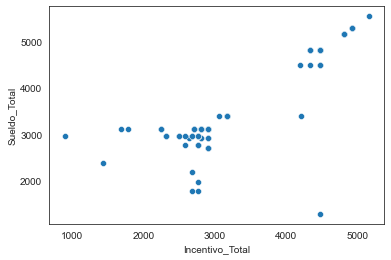

In [77]:
sns.scatterplot(x=df_2020_percepciones['Incentivo_Total'],y=df_2020_percepciones['Sueldo_Total'])

In [16]:
lr = LinearRegression()
lr.fit(df_2020_percepciones['Incentivo_Total'].to_frame(), df_2020_percepciones['Sueldo_Total'])

LinearRegression()

In [17]:
y_predict = lr.predict(df_2020_percepciones['Incentivo_Total'].to_frame())

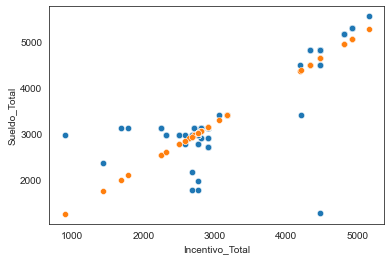

In [19]:
sns.scatterplot(x=df_2020_percepciones['Incentivo_Total'], y=df_2020_percepciones['Sueldo_Total'], s=40);
sns.scatterplot(x=df_2020_percepciones['Incentivo_Total'], y=y_predict, color='#FF7F0E');

Regresion linear 2021

<AxesSubplot:xlabel='Incentivo_Total', ylabel='Sueldo_Total'>

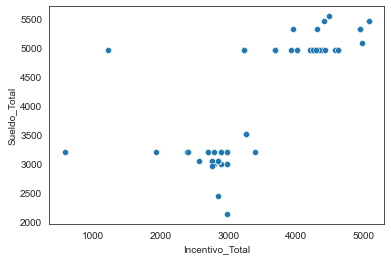

In [21]:
sns.scatterplot(x=df_2021_percepciones['Incentivo_Total'],y=df_2021_percepciones['Sueldo_Total'])

In [22]:
y_predict = lr.predict(df_2021_percepciones['Incentivo_Total'].to_frame())

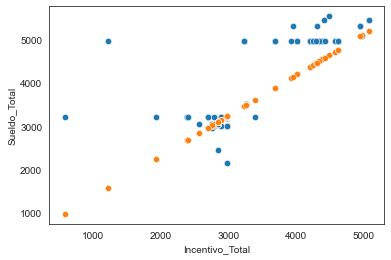

In [23]:
sns.scatterplot(x=df_2021_percepciones['Incentivo_Total'], y=df_2021_percepciones['Sueldo_Total'], s=40);
sns.scatterplot(x=df_2021_percepciones['Incentivo_Total'], y=y_predict, color='#FF7F0E');

Regresion linear multiple

In [24]:
from sklearn.model_selection import train_test_split

In [27]:
X = df_2020_percepciones[['Sueldo_Total', 'Despensa']]
y = df_2020_percepciones['Incentivo_Total']

In [28]:
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [29]:
lr = LinearRegression()
lr.fit(X_training, y_training)

LinearRegression()

In [30]:
lr.score(X_test, y_test)

0.9249520428472046